# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous votre nom, prénom et numéro étudiant :
</div>

In [7]:
# NOM Prénom NuméroEtud

# TME 03 - Opérateurs d'agrégation et LIME

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

instable, bouger x -> dif cf
correlation entre les att comme important par lime, et les att juge a modifier par lime
lime peut avoir des difficulte pour les att sont correl, comme rayon et diametre

## A - Opérateurs d'agrégation

<div class="alert alert-block alert-warning">
L'objet de la 1ère partie de TME est de tracer les lignes de niveaux des opérateurs d'agrégation vus en cours
</div>

<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule la moyenne pondérée d'un vecteur <code>x</code> en fonction d'un vecteur <code>poids</code>
</div>

In [ ]:
def AggMoyPonderee(x, poids):
    return x.T@poids

x = np.array([6,2,1,4])
w = np.array([0.5,0.1,0.2,0.2])
AggMoyPonderee(x, w)

4.2

<div class="alert alert-block alert-info">
    Ecrire une fonction qui trace les lignes de niveaux d'un opérateur, en l'appliquant à des vecteurs de taille 2.
</div>

In [ ]:
def minAgg(u, v):
    return np.minimum(u, v)

def maxAgg(u, v):
    return np.maximum(u+v-1, 0)

def prod(u, v):
    return u*v

def godel(u, v):
    alpha = 0.6
    beta = 0.3
    tab = np.zeros_like(u)
    x = np.array([u, v])
    for i in range(len(u)):
        for j in range(len(v[0])):
            x1, x2 = u[i][j], v[i][j]
            if x1 <= 1-alpha and x2 <= 1- beta:
                tab[i][j] = min(x1,x2)
            elif x1 > 1-alpha and x2 > 1- beta:
                tab[i][j] = max(x1,x2)
            elif x1 > 1-alpha and x2 <= 1- beta:
                tab[i][j] = x1
            elif x1 <= 1-alpha and x2 > 1- beta:
                tab[i][j] = x2
    return tab

In [10]:
def plotOperateur(operater, xmin=0,xmax=1,ymin=0,ymax=1,step=500):
    X, Y =np.meshgrid(np.arange(xmin,xmax,(xmax-xmin)*1./step), np.arange(ymin,ymax,(ymax-ymin)*1./step))
    Z = operater(X, Y) 
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)  # Negative contours default to dashed.
    ax.clabel(CS, fontsize=9, inline=True)
    ax.set_title(f'{operater.__name__}')

<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule un OWA d'un vecteur <code>x</code> en fonction d'un vecteur <code>poids</code>
</div>

In [11]:
def OWA_taille2(u, v):
    tab = np.zeros_like(u)
    w = np.array([0.9, 0.1]) # cas special de choquet
    x = np.array([u, v])
    for i in range(len(u)):
        for j in range(len(v[0])):
            x = np.array([u[i][j], v[i][j]])
            x = np.sort(x)
            tab[i][j] = x.T@w
    return tab
    
def OWA_n(x , w):
    pass

In [12]:
dict_operater = {
    "min" : minAgg,
    "owa" : OWA_taille2,
    "max" : maxAgg,
    "prod": prod,
    "godel": godel
}

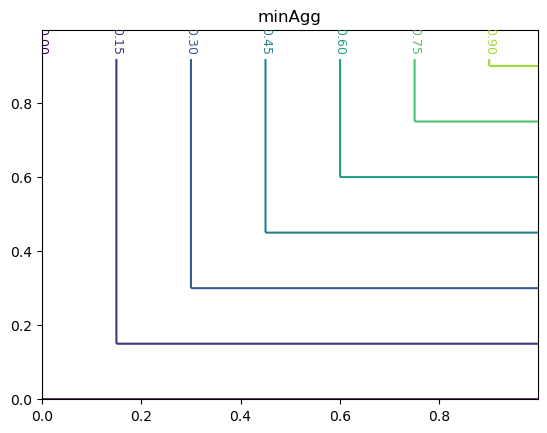

In [13]:
plotOperateur(dict_operater["min"])

<div class="alert alert-block alert-info">
    Visualiser les lignes de niveaux de différentes configurations des moyennes pondérées et des OWA pour différents vecteurs de poids.    
</div>

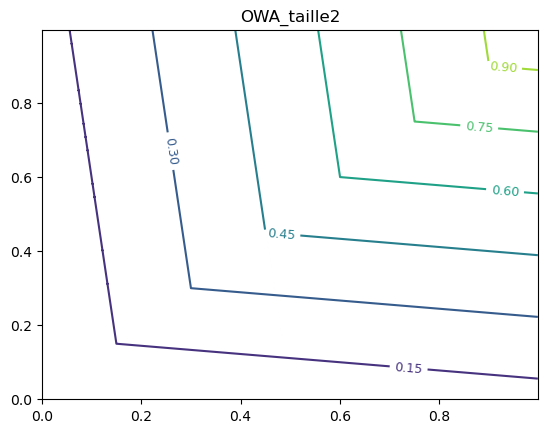

In [ ]:
plotOperateur(dict_operater['owa'])
# ??????

<div class="alert alert-block alert-info">
    Visualiser aussi les lignes de niveaux des opérateurs conjonctifs et disjonctifs vus en cours, ainsi que l'opérateur à comportement variable (intégrale de Gödel), après avoir défini les fonctions permettant de calculer ces opérateurs.
</div>

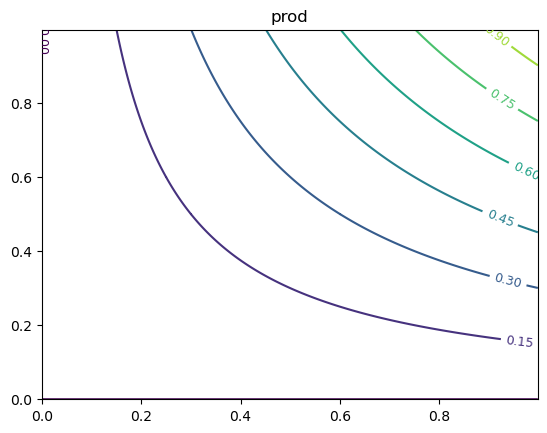

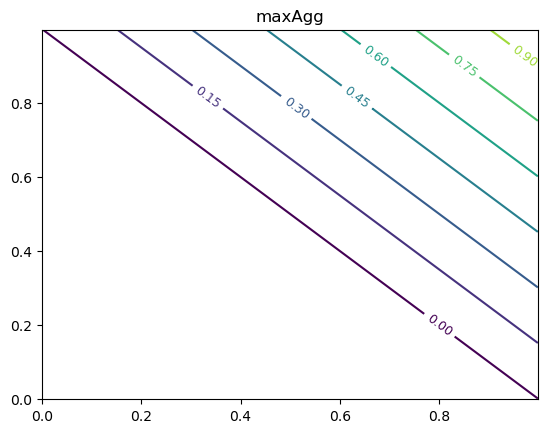

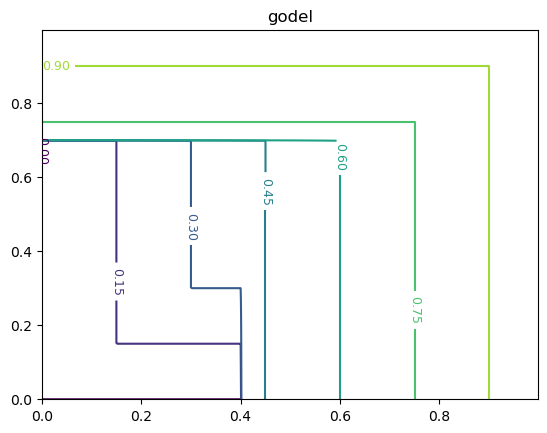

In [ ]:
plotOperateur(dict_operater["prod"])
plotOperateur(dict_operater["max"])
plotOperateur(dict_operater["godel"])

<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule l'intégrale de Choquet d'un vecteur <code>x</code> en fonction d'une capacité <code>mu</code>.<br>
    La fonction ne doit pas imposer de restriction au nombre de composantes de <code>x</code>, sa documentation doit expliciter la représentation choisie pour <code>mu</code>, la fonction doit inclure une vérification que <code>mu</code> satisfait les propriétés d'une capacité.
    
</div>

In [4]:
from itertools import chain, combinations
def compute_superset(x):
    s = list(x)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))
    
def get_A(sigma, x, i):
    if i > len(sigma) - 1:
        return ()
    return tuple(sorted([x[sigma[n]] for n in range(i, len(sigma))]))
 
def choquet(x, mu):
    """
    x   : Liste de taille n
    mu  : Liste de taille 2^n - Ne pas oublier les valeurs pour ensemble vide (0) et pour l'ensemble complet (1).
    
    Attention! L'ordre des entrées importe car nous allons comparer les valeurs une à une.
    x_i -> mu_i pour i dans {1, ..., n}
    """
    sigma = np.argsort(x)
    x = np.sort(x)
    superset = {key:mu_i for key, mu_i in zip(compute_superset(x), mu)}
        
    assert len(superset) == len(mu)
    assert mu[0] == 0
    assert mu[len(mu)-1] == 1
    integral = 0
 
    for i in range(len(x)):
        mu_i = get_A(sigma, x, i)
        mu_i_1 = get_A(sigma, x, i+1)
        integral += (superset.get(mu_i) - superset.get(mu_i_1)) * x[i]
    return integral

In [6]:
choquet([1,2], [0, 1/2, 9/10, 1])
choquet([2,1], [0, 1/2, 9/10, 1])

1.5

<div class="alert alert-block alert-info">
    Visualiser les lignes de niveaux de différentes intégrales de Choquet, pour différentes valeurs des paramètres. 
</div>

<div class="alert alert-block alert-info">
    Commenter les résultats obtenus. 
</div>

<div>
</div>

L'intégale de choquet obtenue nous montre une généralité des différents opérateurs d'aggrégation. Nous pouvons conclure qu'il est possible d'obtenir les mêmes résultats que pour d'autres aggrégateurs en changeant les paramètres de la fonction qui calcule les intégrales de Choquet.

## B - LIME

<div class="alert alert-block alert-warning">
L'objet de cette 2ème partie de TME est de tester l'algorithme LIME sur une tâche de classification assez simple.
</div>

## 1 - Préparation du dataset


<div class="alert alert-block alert-warning">
    Nous allons utiliser les datasets <code>half-moons</code>, que vous savez manipuler, pour permettre la visualisation des résultats et <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">UCI ML Breast Cancer Wisconsin (Diagnostic)</a> qui comporte plus d'attributs.
</div>

<div class="alert alert-block alert-info">
    Tout d'abord, exécuter le bloc ci-dessous pour importer la bibliothèque <code>datasets</code> de <code>sklearn</code>.
</div>

In [14]:
from sklearn import datasets

<div class="alert alert-block alert-info">
    Exécuter le bloc suivant pour charger les données <code>breast_cancer</code>.
 </div>

In [15]:
breast_cancer = datasets.load_breast_cancer()

<div class = "alert alert-block alert-info">
    Q1.1 - Visualiser le contenu de la variable <code>breast_cancer</code>.
</div>

In [16]:
for i in breast_cancer.keys():
    print(i)

data
target
frame
target_names
DESCR
feature_names
filename
data_module


In [17]:
breast_cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

<div class = "alert alert-block alert-info">
    Q1.2 - Définir les variables <code>X_train, X_test, y_train, y_test</code> avec <code>train_test_split</code> où vous utiliserez 25% des données pour le test.
</div>

In [18]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.25)

<div class = "alert alert-block alert-info">
    Q1.3 - Définir la variable <code>feature_names</code> contenant la liste des caractéristiques dans ce dataset ainsi que les noms de classes dans la variable <code>target_names</code>.
</div>

In [55]:
feature_names = breast_cancer.feature_names
print(feature_names)
target_names = breast_cancer.target_names
print(target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


## 2 - Apprentissage d'un modèle linéaire

<div class="alert alert-block alert-warning">
Nous allons apprendre la tâche de classification en utilisant un modèle de régression logistique.
</div>

<div class = "alert alert-block alert-info">
    Q2.1 - Apprendre un modèle <code>logreg</code> de régression logistique sur les données.
</div>

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
logreg = LogisticRegression(class_weight='balanced', max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

<div class = "alert alert-block alert-info">
    Q2.2 - Dans <code>y_pred</code>, calculer les prédictions sur les données de test.
</div>

In [58]:
y_pred = logreg.predict(X_test)

<div class = "alert alert-block alert-info">
    Q2.3 - Avec <code>confusion_matrix</code>, donner la matrice de confusion sur les données de test.
</div>

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(y_test, y_pred)

array([[47,  5],
       [ 4, 87]])

<div class = "alert alert-block alert-info">
    Q2.3 - Avec <code>f1_score</code>, calculer le score f1.
</div>

In [61]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='binary')

0.9508196721311475

<div class = "alert alert-block alert-info">
    Q2.4 - En utilisant les labels des caractéristiques du dataset, dessiner un diagramme en barre de l'importance de chaque caractéristique apprise par la régression logistique.
</div>

<Axes: >

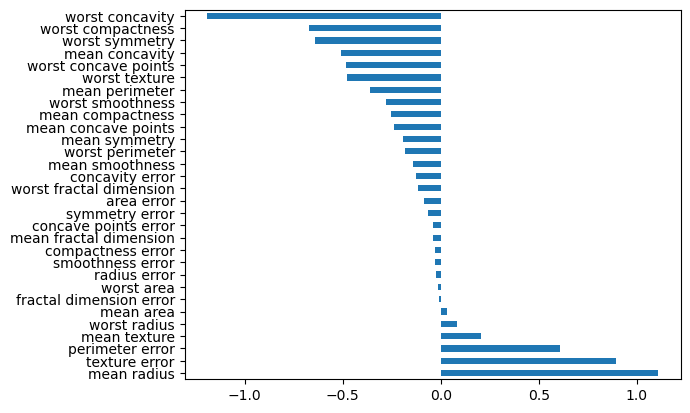

In [62]:
import pandas as pd
coefs = logreg.coef_[0]
pd.Series(coefs, index=feature_names).nlargest(coefs.size).plot(kind='barh')

<div class = "alert alert-block alert-info">
    Q2.5 - De la même manière, donner les importances du premier exemple de la base de test.
</div>

<Axes: >

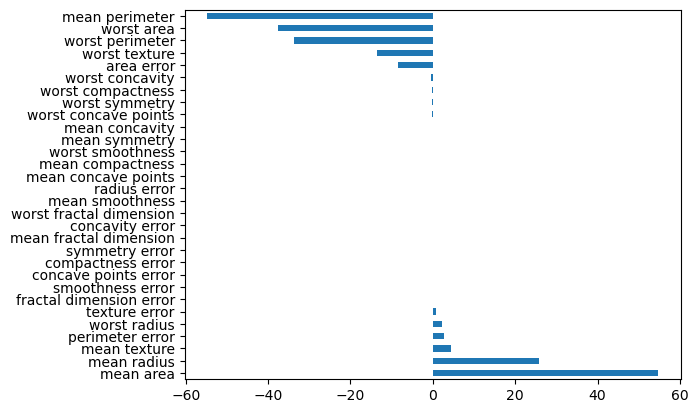

In [63]:
pd.Series(X_test[0]*coefs, index=feature_names).nlargest(X_test[0].size).plot(kind='barh')

## 3 - Explication avec LIME

<div class="alert alert-block alert-warning">
Nous allons étudier une explication donnée par LIME.
</div>

<div class = "alert alert-block alert-info">
    Q3.1 - Exécuter le bloc ci-dessous pour obtenir une explication sur le premier exemple de la base de test. Commentez.
</div>

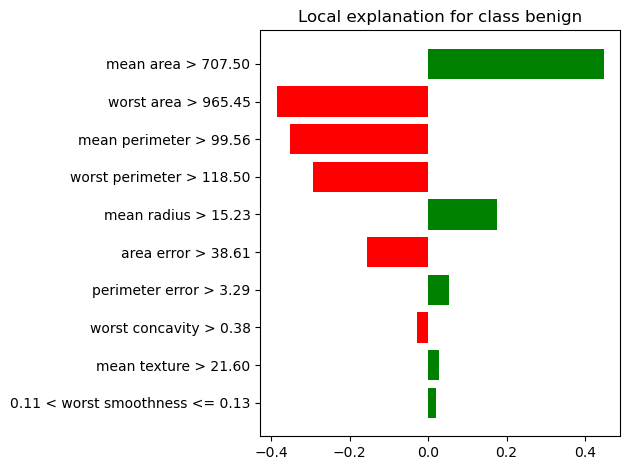

In [64]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(X_test,
    feature_names=feature_names,
    class_names=target_names,
    categorical_features=[],
    mode='classification')

exp = explainer.explain_instance(X_test[0], logreg.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

Remarques: Les attributs importants pour prédire cet exemple appartient à la class benign est:
- $\text{mean area} > 707.5$
- $\text{mean radius}>15.25$

Et les attributs qui ont de grands poids pour prédire la classe de l'exemple n'est pas benign sont:
- $\text{worst area} > 965.45$
- $\text{mean perimeter} > 99.56$
- $\text{worst perimeter} > 118.5$

Nous pouvons ajouter que la magnitude des attributs plus importants pour prédire la classe non-bening est plus importante que pour prédire benign.

<div class = "alert alert-block alert-info">
    Q3.2 - Comparer avec l'exemple suivant de la base de test.
</div>

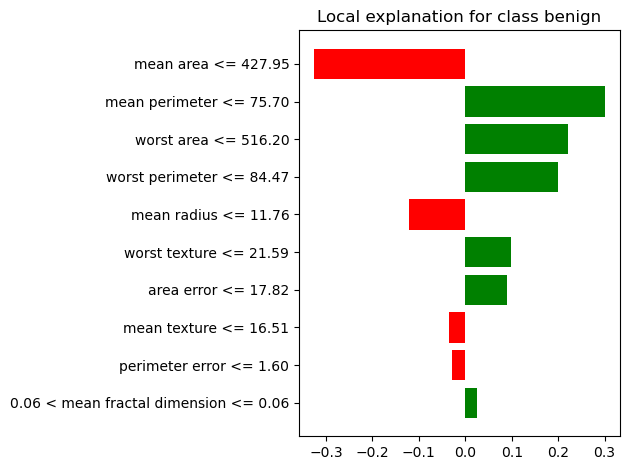

In [65]:
exp = explainer.explain_instance(X_test[1], logreg.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

Comparaison

## 4 - Expérimentations

<div class="alert alert-block alert-info">
    Faire des tests pour examiner le comportement de LIME, par exemple pour examiner sa stabilité par rapport à la donné d'intérêt ou par rapport au classifieur, selon un protocole que vous définirez après avoir spécifié l'étude que vous souhaitez mener.
</div>

## 5 - Données textuelles

<div class="alert alert-block alert-warning">
    Nous allons apprendre un modèle de classification random forest sur les données <code>fetch_20newsgroups</code> puis utiliser LIME pour obtenir des explications sur la classification d'exemples.
</div>

<div class = "alert alert-block alert-info">
À l'aide de la <a href="https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py">documentation du dataset fetch_20newsgroups</a>,  apprendre un modèle random forest de classification bi-classe de texte.
</div>

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [69]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]

categories_2 = [
    "alt.atheism",
    "talk.religion.misc",
]


def size_mb(docs):
    return sum(len(s.encode("utf-8")) for s in docs) / 1e6


def load_dataset(verbose=False, remove=()):
    """Load and vectorize the 20 newsgroups dataset."""

    data_train = fetch_20newsgroups(
        subset="train",
        categories=categories_2,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    data_test = fetch_20newsgroups(
        subset="test",
        categories=categories_2,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    # order of labels in `target_names` can be different from `categories`
    target_names = data_train.target_names

    # split target in a training set and a test set
    y_train, y_test = data_train.target, data_test.target

    # Extracting features from the training data using a sparse vectorizer
    t0 = time()
    vectorizer = TfidfVectorizer(
        sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english"
    )
    X_train = vectorizer.fit_transform(data_train.data)
    duration_train = time() - t0

    # Extracting features from the test data using the same vectorizer
    t0 = time()
    X_test = vectorizer.transform(data_test.data)
    duration_test = time() - t0

    feature_names = vectorizer.get_feature_names_out()

    if verbose:
        # compute size of loaded data
        data_train_size_mb = size_mb(data_train.data)
        data_test_size_mb = size_mb(data_test.data)

        print(
            f"{len(data_train.data)} documents - "
            f"{data_train_size_mb:.2f}MB (training set)"
        )
        print(f"{len(data_test.data)} documents - {data_test_size_mb:.2f}MB (test set)")
        print(f"{len(target_names)} categories")
        print(
            f"vectorize training done in {duration_train:.3f}s "
            f"at {data_train_size_mb / duration_train:.3f}MB/s"
        )
        print(f"n_samples: {X_train.shape[0]}, n_features: {X_train.shape[1]}")
        print(
            f"vectorize testing done in {duration_test:.3f}s "
            f"at {data_test_size_mb / duration_test:.3f}MB/s"
        )
        print(f"n_samples: {X_test.shape[0]}, n_features: {X_test.shape[1]}")

    return X_train, X_test, y_train, y_test, feature_names, target_names


In [70]:
X_train, X_test, y_train, y_test, feature_names, target_names = load_dataset(
    verbose=True
)

857 documents - 1.87MB (training set)
570 documents - 1.30MB (test set)
2 categories
vectorize training done in 0.083s at 22.594MB/s
n_samples: 857, n_features: 4091
vectorize testing done in 0.052s at 25.209MB/s
n_samples: 570, n_features: 4091


In [78]:
clf = RandomForestClassifier(n_estimators = 10, max_depth = 8, random_state = 1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=10, random_state=1)

In [79]:
accuracy_score(y_train, clf.predict(X_train))

0.911318553092182

In [80]:
pred = clf.predict(X_test)

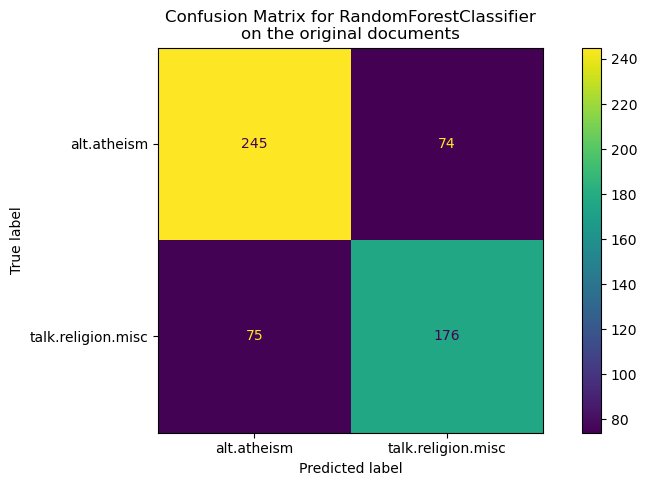

In [81]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {clf.__class__.__name__}\non the original documents"
)

<div class = "alert alert-block alert-info">
Utilisez LIME pour obtenir des explications sur les prédictions obtenues sur des exemples.
    </div>

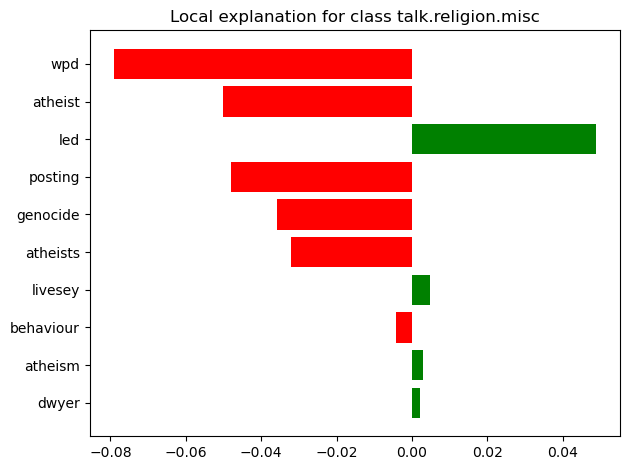

In [82]:
explainer = LimeTabularExplainer(X_test,
    feature_names=feature_names,
    class_names=target_names,
    categorical_features=[],
    mode='classification')

exp = explainer.explain_instance(X_test[0], clf.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

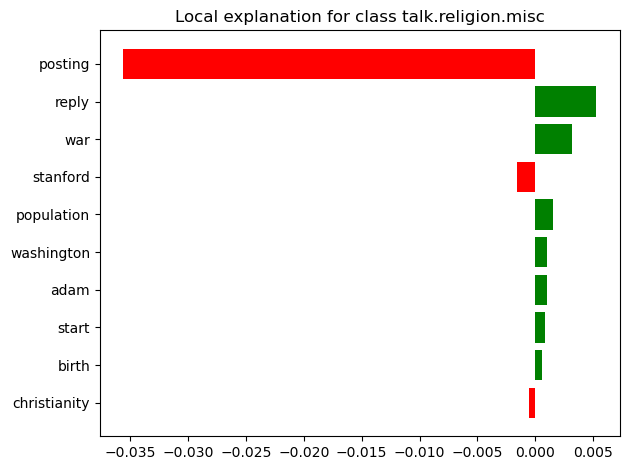

In [83]:
exp = explainer.explain_instance(X_test[10], clf.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

## 6 - Implémentation de LIME

<div class="alert alert-block alert-info">
    Sur des données textuelles, implémentez une version rudimentaire de LIME en utilisant la fonction de proximité proposée dans le cours. Retrouvez-vous les mêmes vecteurs d'importance qu'avec la bibliothèque LIME ?
</div>